<a href="https://www.kaggle.com/code/mrsimple07/data-science-salary-analysis?scriptVersionId=172859441" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jobs-in-data/jobs_in_data.csv


# Data Science Salary Analysis

Welcome to the Data Science Salary Analysis project! In this analysis, we delve into the world of data science salaries to gain insights into the factors that influence compensation in this field. Whether you're a seasoned data scientist looking to benchmark your earnings or someone considering a career in data science, this analysis aims to provide valuable insights into salary trends and drivers.

## Dataset

The dataset used in this analysis comprises anonymized data on data science salaries collected from various sources, including surveys, job postings, and public records. It includes information on salary, education level, years of experience, job title, location, and more. By analyzing this dataset, we aim to uncover patterns and insights that can help professionals make informed decisions regarding their careers and organizations optimize their hiring and compensation strategies.

Data is taken from the Kaggle Platform: https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data

## Column Description

work_year: The year in which the data was recorded. This field indicates the temporal context of the data, important for understanding salary trends over time.

job_title: The specific title of the job role, like 'Data Scientist', 'Data Engineer', or 'Data Analyst'. This column is crucial for understanding the salary distribution across various specialized roles within the data field.

job_category: A classification of the job role into broader categories for easier analysis. This might include areas like 'Data Analysis', 'Machine Learning', 'Data Engineering', etc.

salary_currency: The currency in which the salary is paid, such as USD, EUR, etc. This is important for currency conversion and understanding the actual value of the salary in a global context.

salary: The annual gross salary of the role in the local currency. This raw salary figure is key for direct regional salary comparisons.

salary_in_usd: The annual gross salary converted to United States Dollars (USD). This uniform currency conversion aids in global salary comparisons and analyses.

employee_residence: The country of residence of the employee. This data point can be used to explore geographical salary differences and cost-of-living variations.

## Analysis Overview

Our analysis will be divided into several key sections:

- Exploratory Data Analysis (EDA): We will start by exploring the dataset to understand its structure, distributions, and relationships between variables.
- Salary Distribution: We will examine the distribution of salaries across different demographics such as education level, experience, job title, and location.
- Factors Affecting Salary: We will identify and analyze the factors that influence data science salaries, including education, experience, location, and specific skills.
- Salary Prediction: Using machine learning techniques, we will build models to predict data science salaries based on various features.
- Conclusion and Recommendations: Finally, we will summarize our findings and provide recommendations for individuals and organizations based on our analysis.


# Data importing and Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
df = pd.read_csv('/kaggle/input/jobs-in-data/jobs_in_data.csv')
df.head()


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [4]:
df.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


Checking the missing values:

In [5]:
df.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

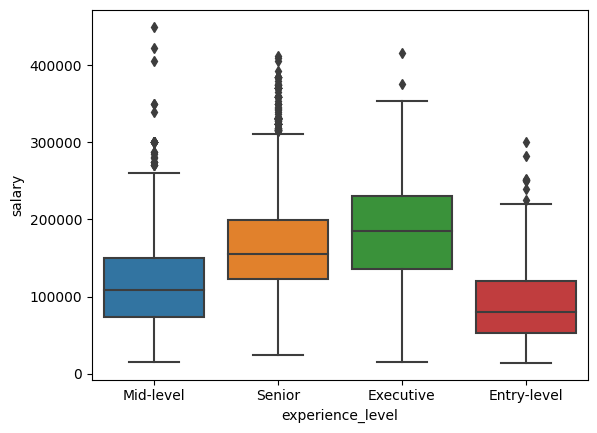

In [6]:
#Salary analysis
#Salary based on experience

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='experience_level', y ='salary', data =df)
plt.show()


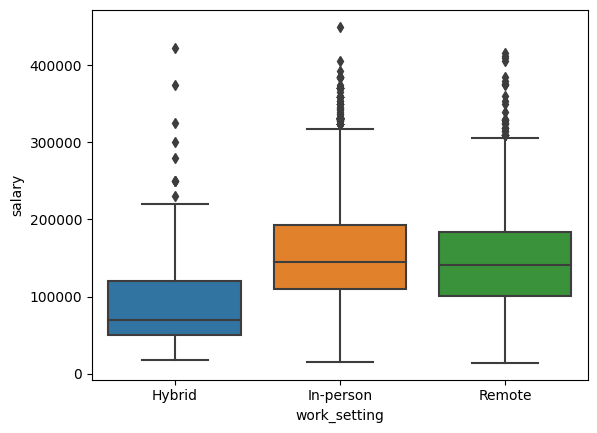

In [7]:
#Salary based on residence

sns.boxplot(x = 'work_setting', y ='salary', data = df)
plt.show()

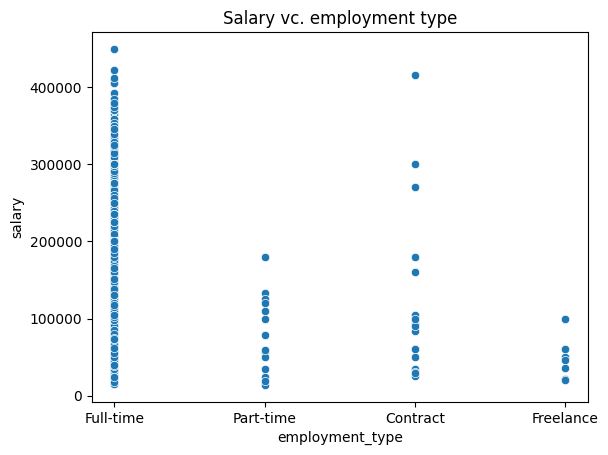

In [8]:
#Scatter Plot for relationship between salary and other factors

sns.scatterplot(x= 'employment_type', y ='salary', data=df)
plt.title('Salary vc. employment type')
plt.show()

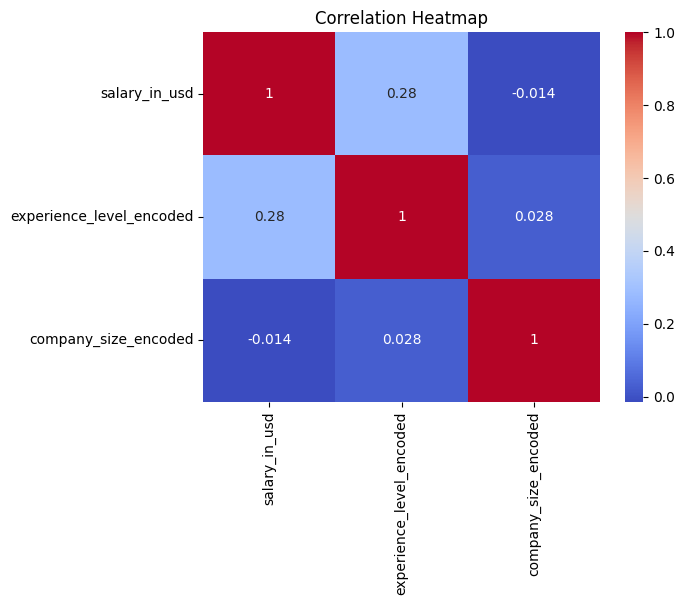

In [9]:
#Correlation heatmap
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['experience_level_encoded'] = label_encoder.fit_transform(df['experience_level'])
df['company_size_encoded'] = label_encoder.fit_transform(df['company_size'])


corr_matrix = df[['salary_in_usd', 'experience_level_encoded', 'company_size_encoded']].corr()
sns.heatmap(corr_matrix, annot = True, cmap ='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,experience_level_encoded,company_size_encoded
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L,2,0
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M,3,1
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M,3,1
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M,3,1
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M,3,1


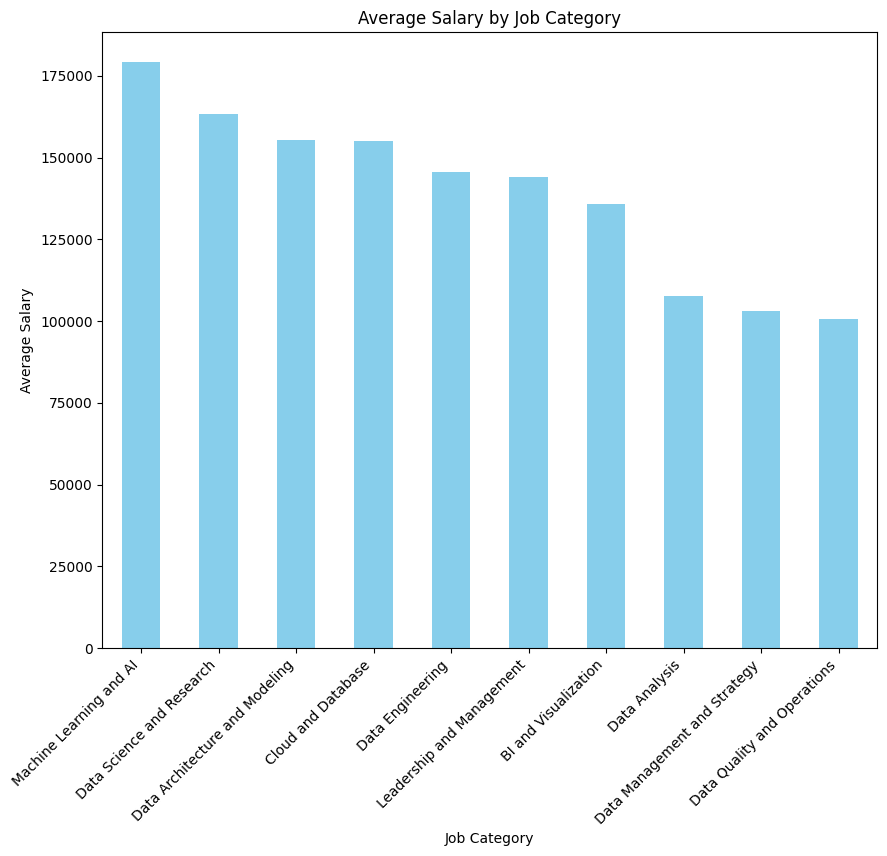

In [11]:
# Group data by 'job_category' and calculate average salary for each category
average_salary_by_category = df.groupby('job_category')['salary'].mean().sort_values(ascending=False)

# Plot the average salary for each job category
plt.figure(figsize=(10, 8))
average_salary_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Salary by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.show()

# Model Selection & Evaluation

And now we are going to build models to predict the salary according to the features. We are building models to predict salary based on features because it helps individuals benchmark their earnings, plan their careers, negotiate fair compensation, assists organizations in optimizing hiring and compensation strategies, and provides valuable market insights into salary trends within the data science field.

Before building models, we've completed essential data preprocessing steps including:

Encoding Categorical Variables: Converted categorical features into numerical format using techniques like one-hot encoding or label encoding, enabling models to process them effectively.

Feature Scaling: Ensured numerical features are on a similar scale, preventing dominance by features with larger magnitudes and aiding model convergence.

Handling Outliers: Identified and addressed outliers in the dataset, employing methods such as trimming, winsorization, or transformation to mitigate their impact on model performance.
With these preprocessing steps completed, the dataset is now cleaned, formatted appropriately, and ready for model training.

In [12]:
# One- hot encoding of the data before building a model
df = pd.get_dummies(df)

### Linear Regression and Random Forest

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df.drop(['salary'], axis =1)
y =df['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

#Random Forest regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
linear_reg_pred = linear_reg_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Evaluate the models
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

print("Mean Squared Error (Linear Regression):", linear_reg_mse)
print("Mean Squared Error (Random Forest):", rf_mse)

Mean Squared Error (Linear Regression): 2.144441435107985e+16
Mean Squared Error (Random Forest): 30903862.160054464


### XGB Regressor

In [15]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)

print(mean_squared_error(xgb_pred, y_test))

24436852.01441873
